In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [104]:
with open("./data_inputs/day14_input.txt") as f:
    input_raw = f.read()

input = [line.split(" -> ") for line in input_raw.split("\n")]
input = [[tuple(map(int, coords.split(","))) for coords in line] for line in input]

In [105]:
min_max_x = [float("inf"), -float("inf")]
min_max_y = [float("inf"), -float("inf")]
for line in input:
    for coord in line:
        if coord[0] < min_max_x[0]:
            min_max_x[0] = coord[0]
        elif coord[0] > min_max_x[1]:
            min_max_x[1] = coord[0]
        if coord[1] < min_max_y[0]:
            min_max_y[0] = coord[1]
        elif coord[1] > min_max_y[1]:
            min_max_y[1] = coord[1]

print("x range:", min_max_x, "\ty range:", min_max_y)

x range: [480, 537] 	y range: [15, 161]


In [106]:
input

[[(508, 146), (513, 146)],
 [(514, 142), (519, 142)],
 [(483, 88), (487, 88)],
 [(522, 146), (527, 146)],
 [(492, 90), (496, 90)],
 [(525, 161),
  (525, 156),
  (525, 161),
  (527, 161),
  (527, 156),
  (527, 161),
  (529, 161),
  (529, 154),
  (529, 161),
  (531, 161),
  (531, 154),
  (531, 161),
  (533, 161),
  (533, 157),
  (533, 161),
  (535, 161),
  (535, 152),
  (535, 161),
  (537, 161),
  (537, 160),
  (537, 161)],
 [(508, 93),
  (508, 97),
  (507, 97),
  (507, 101),
  (517, 101),
  (517, 97),
  (510, 97),
  (510, 93)],
 [(525, 161),
  (525, 156),
  (525, 161),
  (527, 161),
  (527, 156),
  (527, 161),
  (529, 161),
  (529, 154),
  (529, 161),
  (531, 161),
  (531, 154),
  (531, 161),
  (533, 161),
  (533, 157),
  (533, 161),
  (535, 161),
  (535, 152),
  (535, 161),
  (537, 161),
  (537, 160),
  (537, 161)],
 [(486, 86), (490, 86)],
 [(489, 84), (493, 84)],
 [(507, 79), (511, 79)],
 [(486, 90), (490, 90)],
 [(497, 23),
  (497, 15),
  (497, 23),
  (499, 23),
  (499, 21),
  (499,

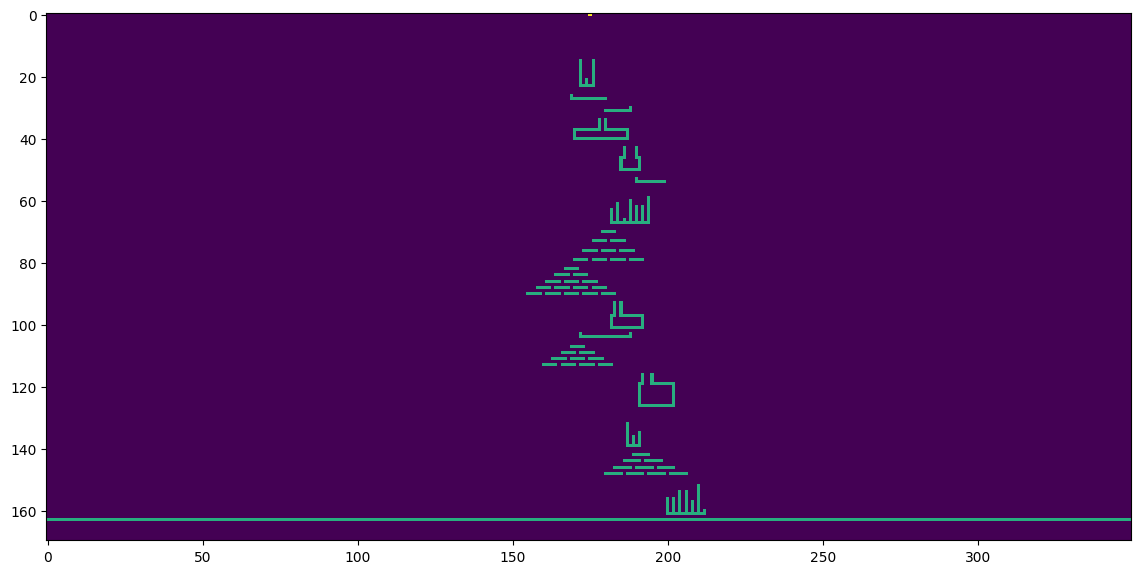

In [139]:
x_off = 325

SOURCE = 8
SAND = 9
TRAIL = 2
ROCK = 5
AIR = 0

def generate_cave_map(part=1, h=170, w=350, input=input):
    cave_map = np.zeros((h, w), dtype=np.uint8)  # i, j => y, x
    cave_map[0, 500-x_off] = SOURCE

    for line in input:
        for i in range(len(line) - 1):
            x1, y1 = line[i]
            x2, y2 = line[i+1]
            x1, x2 = x1 - x_off, x2 - x_off
            if x1 > x2:
                x1, x2 = x2, x1
            if y1 > y2:
                y1, y2 = y2, y1

            if x1 == x2:       
                cave_map[y1:(y2+1), x1] = ROCK
            else:
                cave_map[y1, x1:(x2+1)] = ROCK

    if part == 2:
        cave_map[min_max_y[1]+2] = ROCK

    return cave_map


cave_map = generate_cave_map(part=2)

plt.imshow(cave_map)
plt.rcParams["figure.figsize"] = (8, 16)
plt.show()

In [145]:
def sand_simulation(cave_map, x_off=x_off):
    count_sand_stable = 0
    is_all_sand_falling = False

    while not is_all_sand_falling:
        is_sand_stable = False
        sand_i = [0, 500-x_off]
        
        while not is_sand_stable and not is_all_sand_falling:
            if sand_i[0] >= 169:
                is_all_sand_falling = True
                break
            
            if cave_map[tuple(sand_i)] != TRAIL:
                cave_map[tuple(sand_i)] = TRAIL

            down = (sand_i[0]+1, sand_i[1])
            down_l = (sand_i[0]+1, sand_i[1]-1)
            down_r = (sand_i[0]+1, sand_i[1]+1)

            if cave_map[down] in [AIR, TRAIL]:
                sand_i = down
            elif cave_map[down_l] in [AIR, TRAIL]:
                sand_i = down_l
            elif cave_map[down_r] in [AIR, TRAIL]:
                sand_i = down_r
            else:
                cave_map[tuple(sand_i)] = SAND
                is_sand_stable = True
                count_sand_stable += 1
                if sand_i == [0, 500-x_off]:
                    is_all_sand_falling = True

    return count_sand_stable

Result 1: 674


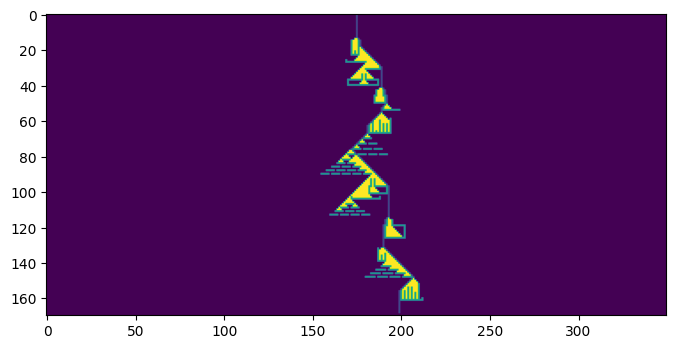

In [141]:
# ---- Part 1 ----

cave_map = generate_cave_map(part=1)

count_sand_stable = sand_simulation(cave_map)

print("Result 1:", count_sand_stable)

plt.imshow(cave_map)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()

Result 2: 24958


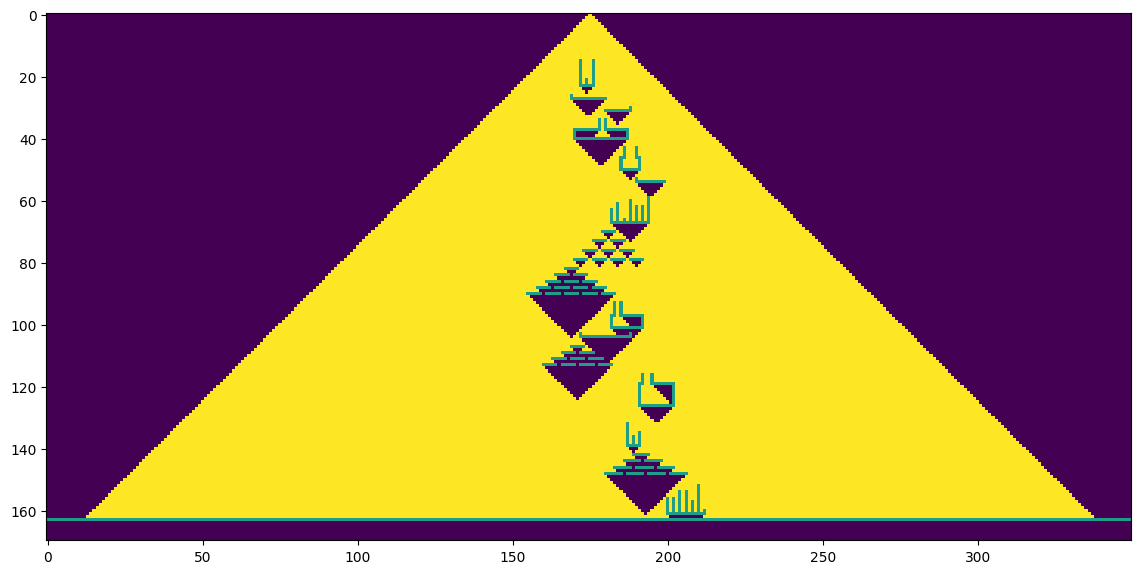

In [146]:
# ---- Part 2 ----

cave_map2 = generate_cave_map(part=2)

count_sand_stable2 = sand_simulation(cave_map2)

print("Result 2:", count_sand_stable2)

plt.imshow(cave_map2)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()

In [129]:
sand_i = [0, 500-x_off]

np.all(cave_map2[sand_i[0]-1, sand_i[1]-1:sand_i[1]+1] == SAND)

False

In [133]:
sand_i

[0, 175]

In [138]:
SAND

9

In [137]:
cave_map2[1, 164:167]

array([9, 9, 9], dtype=uint8)

In [131]:
cave_map2[sand_i[0]-1, sand_i[1]-1:sand_i[1]+2]

array([0, 0, 0], dtype=uint8)

In [144]:
np.sum(cave_map2==SAND)

24958

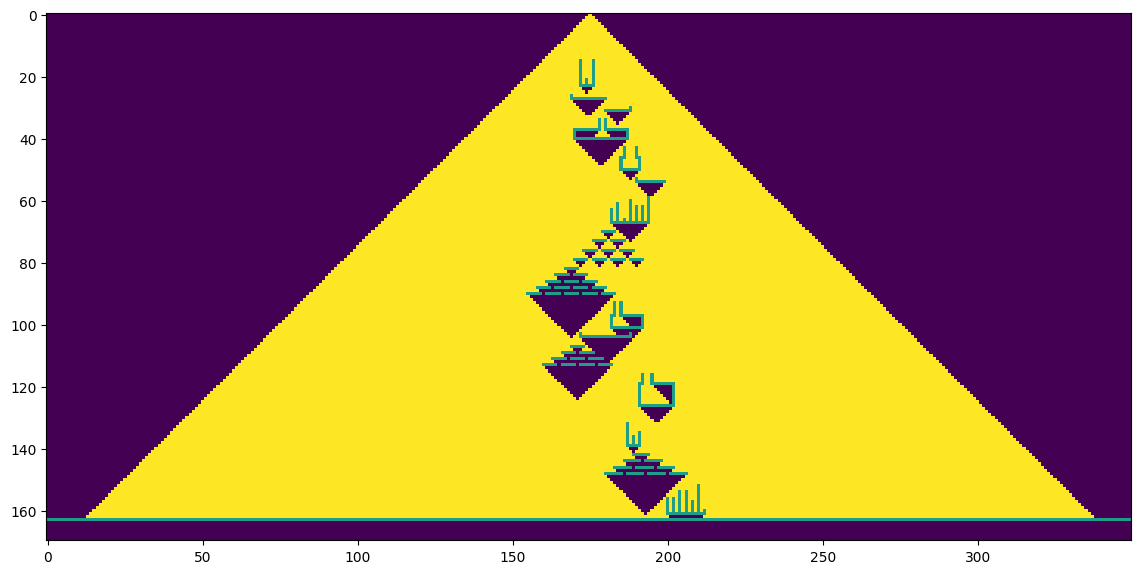

In [143]:
plt.imshow(cave_map2)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()